# Introducción / Introduction

**Español**
> Este proyecto analiza los resultados de la elección presidencial de México en 2012, comparando los datos oficiales del **INE** (Instituto Nacional Electoral, la autoridad autónoma encargada de organizar las elecciones) con las "sábanas" de resultados recolectadas por **#YOSOY132**, un movimiento estudiantil que realizó un conteo ciudadano masivo mediante fotografías de las actas en las casillas. </br></br> El objetivo principal es evaluar la calidad y confiabilidad de este conjunto de datos recolectado por este movimiento ciudadano, identificando posibles sesgos en el muestreo y discrepancias estadísticas significativas entre ambas fuentes de información.</br>

**English**
> This notebook presents an analysis of the 2012 Mexican presidential election results, comparing official data from the **INE** (National Electoral Institute, Mexico's autonomous public authority responsible for organizing elections) with the vote tally sheets collected by **#YOSOY132**, a student movement that organized a massive crowdsourced audit by photographing results directly at polling stations. </br></br> The primary objective is to evaluate the quality and reliability of this crowdsourced dataset, identifying potential sampling biases and significant statistical discrepancies between both information sources.


In [27]:
import pandas as pd
import json

In [28]:
# Abrir los resultados del ine en una lista (se usa pandas para abrirlo como csv separado por '|')
datos_ine = pd.read_csv('DATOS_COMPUTARIZADOS_INE_2012/datos_computos_res_presidente_partidos.txt', sep='|')
datos_ine = datos_ine.values.tolist()

print(len(datos_ine))
print(datos_ine)

298
[[19, 7, 2419, 46, 126701, 129120, 50994, 37490, 19682, 4473, 7740, 3145, 3131], [30, 6, 3468, 14, 142607, 146075, 45463, 46666, 30870, 6470, 5434, 5538, 2152], [17, 5, 4785, 39, 155326, 160111, 25429, 45693, 48995, 9144, 12910, 9267, 3849], [16, 11, 4835, 76, 131737, 136572, 21839, 46854, 42403, 7807, 5830, 4124, 2804], [22, 3, 4484, 114, 209797, 214281, 78593, 63248, 40622, 7842, 7555, 6464, 5359], [13, 1, 7578, 35, 163502, 171080, 29982, 70726, 42253, 5001, 5969, 3572, 5964], [28, 2, 3701, 47, 172558, 176259, 70252, 50546, 28458, 6523, 7256, 5579, 3897], [21, 7, 4078, 19, 136793, 140871, 26589, 42290, 34576, 9471, 13306, 7319, 3223], [14, 15, 4626, 39, 163671, 168297, 55534, 64314, 17633, 8473, 6059, 8164, 3455], [26, 7, 4806, 24, 158103, 162909, 51369, 54763, 35104, 6439, 5225, 3654, 1525], [15, 3, 5090, 26, 148178, 153268, 28570, 81934, 16786, 9903, 3415, 4476, 3068], [11, 1, 5350, 44, 126551, 131901, 49400, 49253, 11445, 8451, 2486, 1373, 4099], [14, 12, 6799, 96, 254635, 261

In [29]:
# Abrir los resultados del 132 en una lista
with open('SABANAS_INE_ELECCION_2012/nombre_archivos.txt', 'r') as archivo_nombres:
    nombres = list(archivo_nombres)
    nombres = [s.strip('\n') for s in nombres]
    data_132 = []

    for nombre in nombres:
        with open(f'SABANAS_INE_ELECCION_2012/{nombre}', 'r') as archivo_datos:
            data = json.load(archivo_datos)['sabanas']
            data_132 += data          

print(len(data_132))

# Se imprimen solo los primeros 10 porque hay demasiados datos
for i in data_132[:10]:
    print(i)

23000
{'id': '27001', 'proyecto': 'YoSoyAntiFraude', 'fuente': 'yosoyantifraude.org', 'imagen': 'http://cdnsabanas.yosoyantifraude.org/5726449a2038fa4e2aa549953f1db049d40f02dc-original.jpg', 'imagen_original': 'http://sabanasraw.yosoyantifraude.org/5726449a2038fa4e2aa549953f1db049d40f02dc', 'entidad': '9', 'municipio': 'GUSTAVO A. MADERO', 'distrito': '7', 'seccion': '1375', 'tipoCasilla': 'CONTIGUA', 'sha': '5726449a2038fa4e2aa549953f1db049d40f02dc', 'idcasilla': '41750', 'revision': '6', 'resultados': {'pan': '55', 'pri': '66', 'prd': '153', 'verde': '6', 'pt': '9', 'mov': '7', 'nuevaAlianza': '10', 'pri_verde': '24', 'prd_pt_mov': '77', 'prd_pt': '12', 'prd_mov': '1', 'pt_mov': '1', 'noRegistrados': '3', 'nulos': '9'}}
{'id': '27002', 'proyecto': 'YoSoyAntiFraude', 'fuente': 'yosoyantifraude.org', 'imagen': 'http://cdnsabanas.yosoyantifraude.org/8bb7b97130b036e790484fd69c8b1690df75ea33-original.jpg', 'imagen_original': 'http://sabanasraw.yosoyantifraude.org/8bb7b97130b036e790484fd69

In [30]:
# Numero total de votos validos calculados por el INE
lista_partidos_ine = ['PAN', 'PRI + PVEM', 'PRD + MC + PT', 'PANAL']
resultados_partidos_ine = {'PAN': 0, 'PRI + PVEM': 0, 'PRD + MC + PT': 0, 'PANAL': 0}
votos_totales_ine = 0

for fila in datos_ine:
    votos = fila[4] # NUMERO_VOTOS_VALIDOS
    votos_totales_ine += votos

    for (index, partido) in enumerate(lista_partidos_ine):
        if partido == 'PAN':
            resultados_partidos_ine[partido] += fila[6]

        elif partido == 'PRI + PVEM':
            resultados_partidos_ine[partido] += fila[7]
            resultados_partidos_ine[partido] += fila[9]

        elif partido == 'PRD + MC + PT':
            resultados_partidos_ine[partido] += fila[8]
            resultados_partidos_ine[partido] += fila[10]
            resultados_partidos_ine[partido] += fila[11]

        elif partido == 'PANAL':
            resultados_partidos_ine[partido] += fila[12]

print(f'Total de votos (validos) INE: {votos_totales_ine:,}')
print('\n'.join(f'{partido}: {votos:,} ({votos/votos_totales_ine*100:.2f}%)' for partido, votos in resultados_partidos_ine.items()))

Total de votos (validos) INE: 48,788,095
PAN: 12,674,538 (25.98%)
PRI + PVEM: 19,117,156 (39.18%)
PRD + MC + PT: 15,832,917 (32.45%)
PANAL: 1,144,847 (2.35%)


In [31]:
# Total votos validos 132
lista_partidos_132 = ['pan', 'pri + verde', 'prd + mov + pt', 'nuevaAlianza']
resultados_partidos_132 = {'pan': 0, 'pri + verde': 0, 'prd + mov + pt': 0, 'nuevaAlianza' :0}
votos_totales_132 = 0

for fila in data_132:
    for partido in lista_partidos_132:
        
        if partido == 'pan':
            resultados_partidos_132[partido] += int(fila['resultados']['pan'])

        if partido == 'pri + verde':
            resultados_partidos_132[partido] += int(fila['resultados']['pri'])
            resultados_partidos_132[partido] += int(fila['resultados']['verde'])

        if partido == 'prd + mov + pt':
            resultados_partidos_132[partido] += int(fila['resultados']['prd'])
            resultados_partidos_132[partido] += int(fila['resultados']['mov'])
            resultados_partidos_132[partido] += int(fila['resultados']['pt'])

        elif partido == 'nuevaAlianza':
            resultados_partidos_132['nuevaAlianza'] += int(fila['resultados']['nuevaAlianza'])

    votos_totales_132 += sum(int(res) for res in list(fila['resultados'].values())[:7])

print(f'Total de votos (validos) 132: {votos_totales_132:,}')
print('\n'.join(f'{partido}: {votos:,} ({votos/votos_totales_132*100:.2f}%)' for partido, votos in resultados_partidos_132.items()))

Total de votos (validos) 132: 7,292,025
pan: 2,247,447 (30.82%)
pri + verde: 2,123,777 (29.12%)
prd + mov + pt: 2,717,310 (37.26%)
nuevaAlianza: 203,491 (2.79%)


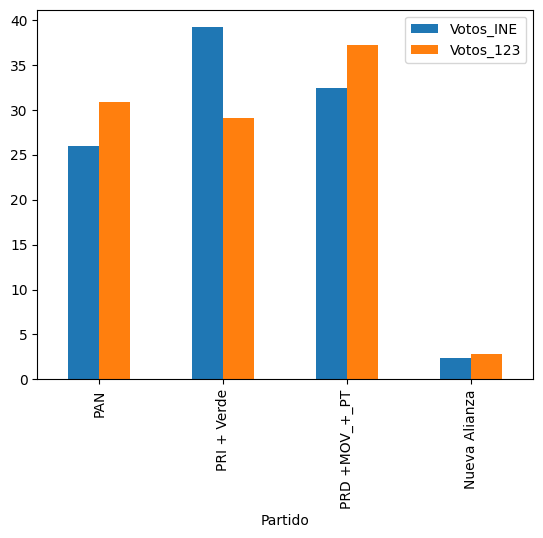

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv ("datos/datos.csv")
data.plot(x='Partido', y=['Votos_INE', 'Votos_123'], kind='bar')
plt.show()

In [32]:
# Total votos validos 132 SIN CDMX
lista_partidos_132 = ['pan', 'pri + verde', 'prd + mov + pt', 'nuevaAlianza']
resultados_partidos_132_nocd = {'pan': 0, 'pri + verde': 0, 'prd + mov + pt': 0, 'nuevaAlianza' :0}
votos_totales_132_nocd = 0

for fila in data_132:
    for partido in lista_partidos_132:
        if int(fila['entidad']) != 9:
            if partido == 'pan':
                resultados_partidos_132_nocd[partido] += int(fila['resultados']['pan'])

            if partido == 'pri + verde':
                resultados_partidos_132_nocd[partido] += int(fila['resultados']['pri'])
                resultados_partidos_132_nocd[partido] += int(fila['resultados']['verde'])

            if partido == 'prd + mov + pt':
                resultados_partidos_132_nocd[partido] += int(fila['resultados']['prd'])
                resultados_partidos_132_nocd[partido] += int(fila['resultados']['mov'])
                resultados_partidos_132_nocd[partido] += int(fila['resultados']['pt'])

            elif partido == 'nuevaAlianza':
                resultados_partidos_132_nocd['nuevaAlianza'] += int(fila['resultados']['nuevaAlianza'])

    votos_totales_132_nocd += sum(int(res) for res in list(fila['resultados'].values())[:7] if int(fila['entidad']) != 9)

print(f'Total de votos (validos) SIN CDMX 132: {votos_totales_132_nocd:,}')
print('\n'.join(f'{partido}: {votos:,} ({votos/votos_totales_132_nocd*100:.2f}%)' for partido, votos in resultados_partidos_132_nocd.items()))

Total de votos (validos) SIN CDMX 132: 5,334,829
pan: 1,744,587 (32.70%)
pri + verde: 1,635,742 (30.66%)
prd + mov + pt: 1,795,187 (33.65%)
nuevaAlianza: 159,313 (2.99%)


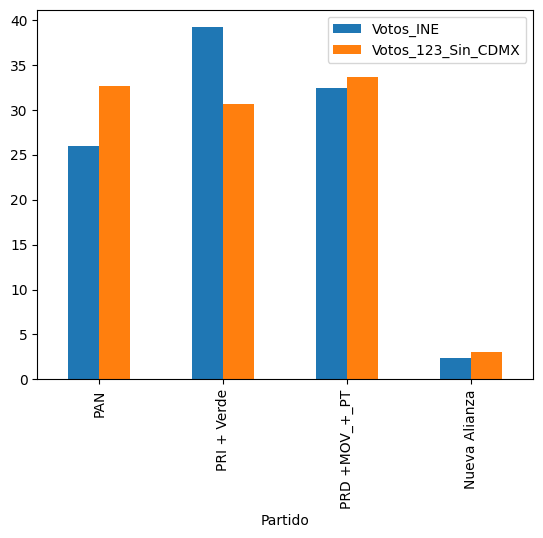

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv ("datos/datos copy.csv")
data.plot(x='Partido', y=['Votos_INE', 'Votos_123_Sin_CDMX'], kind='bar')
plt.show()

In [33]:
# Votos por Entidad INE
lista_partidos_ine = ['PAN', 'PRI + PVEM', 'PRD + MC + PT', 'PANAL']
resultados_partidos_estados_ine = [
    [id_estado, {p: 0 for p in lista_partidos_ine}] for id_estado in range(1, 33)
]

for fila in datos_ine:
    id_estado = fila[0]

    for (index, partido) in enumerate(lista_partidos_ine):

        if partido == 'PAN':
            resultados_partidos_estados_ine[id_estado-1][1][partido] += fila[6]

        elif partido == 'PRI + PVEM':
            resultados_partidos_estados_ine[id_estado-1][1][partido] += fila[7]
            resultados_partidos_estados_ine[id_estado-1][1][partido] += fila[9]

        elif partido == 'PRD + MC + PT':
            resultados_partidos_estados_ine[id_estado-1][1][partido] += fila[8]
            resultados_partidos_estados_ine[id_estado-1][1][partido] += fila[10]
            resultados_partidos_estados_ine[id_estado-1][1][partido] += fila[11]

        elif partido == 'PANAL':
            resultados_partidos_estados_ine[id_estado-1][1][partido] += fila[12]

print('Votos por entidad (INE)')
for entidad, votos_dict in resultados_partidos_estados_ine:
    total = sum(votos_dict.values())
    partidos_str = ", ".join(
        f"{p}: {votos_dict[p]:,} ({votos_dict[p]/total*100:.2f}%)"
        for p in lista_partidos_ine
    )
    print(f"Entidad {entidad} | {partidos_str}")

Votos por entidad (INE)
Entidad 1 | PAN: 152,548 (31.80%), PRI + PVEM: 190,774 (39.77%), PRD + MC + PT: 102,627 (21.40%), PANAL: 33,706 (7.03%)
Entidad 2 | PAN: 343,418 (27.68%), PRI + PVEM: 467,987 (37.73%), PRD + MC + PT: 393,866 (31.75%), PANAL: 35,229 (2.84%)
Entidad 3 | PAN: 75,554 (30.29%), PRI + PVEM: 105,259 (42.20%), PRD + MC + PT: 63,637 (25.51%), PANAL: 4,974 (1.99%)
Entidad 4 | PAN: 108,561 (29.20%), PRI + PVEM: 150,256 (40.41%), PRD + MC + PT: 103,211 (27.76%), PANAL: 9,785 (2.63%)
Entidad 5 | PAN: 431,408 (37.14%), PRI + PVEM: 467,204 (40.22%), PRD + MC + PT: 234,912 (20.23%), PANAL: 27,957 (2.41%)
Entidad 6 | PAN: 101,520 (33.96%), PRI + PVEM: 124,138 (41.53%), PRD + MC + PT: 68,386 (22.88%), PANAL: 4,881 (1.63%)
Entidad 7 | PAN: 326,527 (16.80%), PRI + PVEM: 934,270 (48.06%), PRD + MC + PT: 635,176 (32.67%), PANAL: 48,111 (2.47%)
Entidad 8 | PAN: 328,840 (25.32%), PRI + PVEM: 619,627 (47.70%), PRD + MC + PT: 302,090 (23.26%), PANAL: 48,318 (3.72%)
Entidad 9 | PAN: 844,3

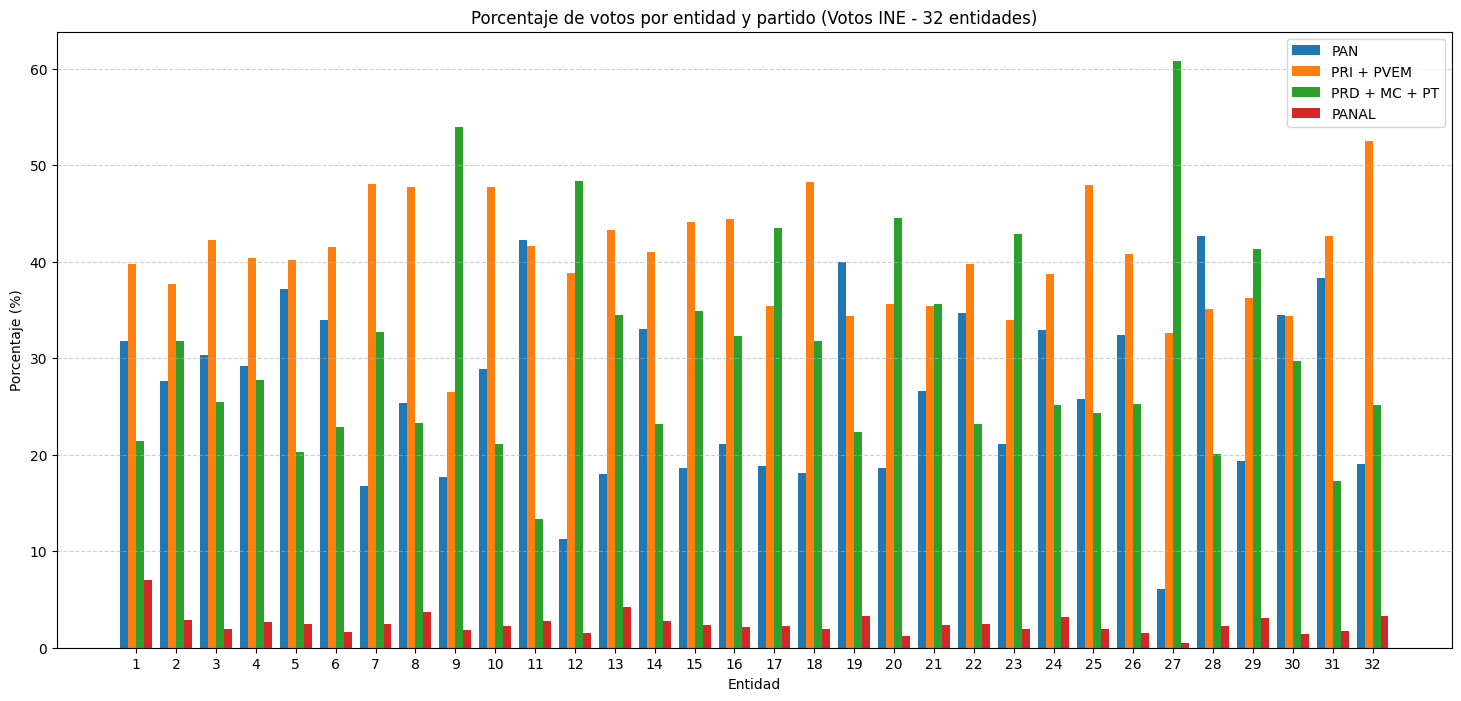

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Datos de porcentajes (INE, sin el símbolo %)
data_ine = {
    "Entidad": list(range(1, 33)),
    "PAN": [31.80, 27.68, 30.29, 29.20, 37.14, 33.96, 16.80, 25.32, 17.74, 28.90,
            42.25, 11.26, 18.01, 33.05, 18.62, 21.13, 18.82, 18.07, 39.97, 18.63,
            26.60, 34.66, 21.12, 32.91, 25.77, 32.44, 6.11, 42.62, 19.35, 34.46,
            38.27, 19.00],
    "PRI + PVEM": [39.77, 37.73, 42.20, 40.41, 40.22, 41.53, 48.06, 47.70, 26.45, 47.71,
                   41.61, 38.87, 43.29, 40.97, 44.15, 44.40, 35.42, 48.24, 34.40, 35.62,
                   35.45, 39.74, 34.00, 38.74, 47.98, 40.75, 32.56, 35.08, 36.22, 34.42,
                   42.71, 52.55],
    "PRD + MC + PT": [21.40, 31.75, 25.51, 27.76, 20.23, 22.88, 32.67, 23.26, 53.98, 21.09,
                      13.33, 48.39, 34.50, 23.17, 34.85, 32.32, 43.48, 31.75, 22.38, 44.57,
                      35.62, 23.16, 42.91, 25.17, 24.28, 25.29, 60.79, 20.05, 41.29, 29.67,
                      17.26, 25.12],
    "PANAL": [7.03, 2.84, 1.99, 2.63, 2.41, 1.63, 2.47, 3.72, 1.84, 2.29,
              2.82, 1.48, 4.20, 2.81, 2.39, 2.15, 2.28, 1.94, 3.25, 1.17,
              2.32, 2.44, 1.97, 3.18, 1.97, 1.53, 0.54, 2.25, 3.13, 1.45,
              1.76, 3.33]
}

# Crear DataFrame
df_ine = pd.DataFrame(data_ine)

# Gráfica de barras agrupadas
x = np.arange(len(df_ine["Entidad"]))
ancho = 0.2

plt.figure(figsize=(18, 8))
plt.bar(x - 1.5*ancho, df_ine["PAN"], width=ancho, label="PAN")
plt.bar(x - 0.5*ancho, df_ine["PRI + PVEM"], width=ancho, label="PRI + PVEM")
plt.bar(x + 0.5*ancho, df_ine["PRD + MC + PT"], width=ancho, label="PRD + MC + PT")
plt.bar(x + 1.5*ancho, df_ine["PANAL"], width=ancho, label="PANAL")

plt.title("Porcentaje de votos por entidad y partido (Votos INE - 32 entidades)")
plt.xlabel("Entidad")
plt.ylabel("Porcentaje (%)")
plt.xticks(x, df_ine["Entidad"])
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()


In [34]:
# Votos por distrito 132
lista_partidos_132 = ['pan', 'pri + verde', 'prd + mov + pt', 'nuevaAlianza']


resultados_partidos_estados_132 = [
    [id_estado, {p: 0 for p in lista_partidos_132}] for id_estado in range(1, 33)
]

for fila in data_132:
    id_estado = int(fila['entidad'])

    for partido in lista_partidos_132:
        if partido == 'pan':
            resultados_partidos_estados_132[id_estado-1][1]['pan'] += int(fila['resultados']['pan'])

        elif partido == 'pri + verde':
            resultados_partidos_estados_132[id_estado-1][1]['pri + verde'] += int(fila['resultados']['pri'])
            resultados_partidos_estados_132[id_estado-1][1]['pri + verde'] += int(fila['resultados']['verde'])

        elif partido == 'prd + mov + pt':
            resultados_partidos_estados_132[id_estado-1][1]['prd + mov + pt'] += int(fila['resultados']['prd'])
            resultados_partidos_estados_132[id_estado-1][1]['prd + mov + pt'] += int(fila['resultados']['mov'])
            resultados_partidos_estados_132[id_estado-1][1]['prd + mov + pt'] += int(fila['resultados']['pt'])

        elif partido == 'nuevaAlianza':
            resultados_partidos_estados_132[id_estado-1][1]['nuevaAlianza'] += int(fila['resultados']['nuevaAlianza'])

print('Votos por entidad (132)')
for entidad, votos_dict in resultados_partidos_estados_132:
    total = sum(votos_dict.values())
    #a += total
    partidos_str = ", ".join(
        f"{p}: {votos_dict[p]:,} ({votos_dict[p]/total*100:.2f}%)"
        for p in lista_partidos_132
    )
    print(f"Entidad {entidad} | {partidos_str}")

Votos por entidad (132)
Entidad 1 | pan: 22,048 (37.31%), pri + verde: 19,226 (32.53%), prd + mov + pt: 13,859 (23.45%), nuevaAlianza: 3,965 (6.71%)
Entidad 2 | pan: 127,975 (33.85%), pri + verde: 112,949 (29.87%), prd + mov + pt: 124,690 (32.98%), nuevaAlianza: 12,460 (3.30%)
Entidad 3 | pan: 12,269 (37.36%), pri + verde: 11,873 (36.15%), prd + mov + pt: 7,888 (24.02%), nuevaAlianza: 811 (2.47%)
Entidad 4 | pan: 10,400 (31.29%), pri + verde: 10,598 (31.89%), prd + mov + pt: 11,127 (33.48%), nuevaAlianza: 1,110 (3.34%)
Entidad 5 | pan: 51,554 (45.44%), pri + verde: 33,408 (29.45%), prd + mov + pt: 25,037 (22.07%), nuevaAlianza: 3,459 (3.05%)
Entidad 6 | pan: 16,177 (40.41%), pri + verde: 13,395 (33.46%), prd + mov + pt: 9,668 (24.15%), nuevaAlianza: 796 (1.99%)
Entidad 7 | pan: 18,082 (20.38%), pri + verde: 30,519 (34.40%), prd + mov + pt: 37,502 (42.27%), nuevaAlianza: 2,607 (2.94%)
Entidad 8 | pan: 36,283 (35.05%), pri + verde: 36,869 (35.62%), prd + mov + pt: 25,285 (24.43%), nuevaA

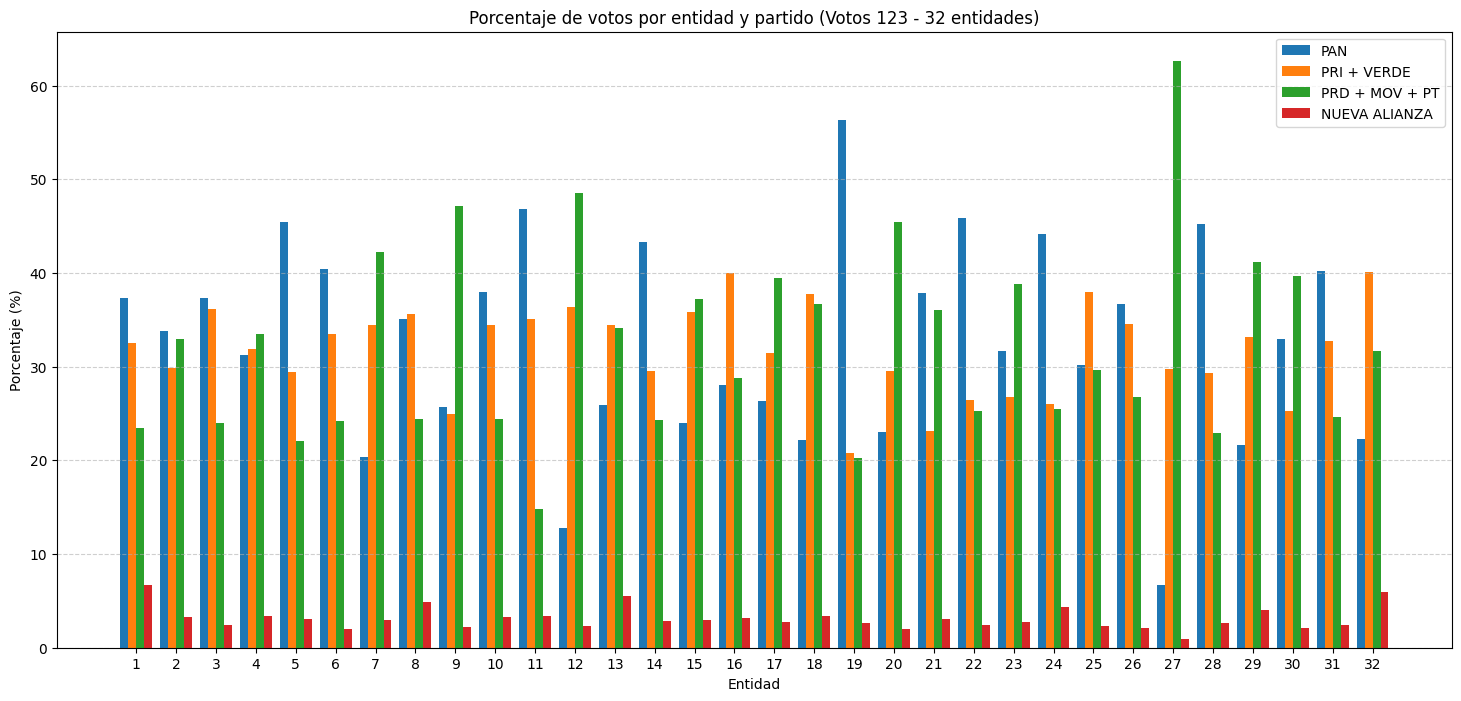

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Datos de porcentajes (sin %)
data2 = {
    "Entidad": list(range(1, 33)),
    "PAN": [37.31, 33.85, 37.36, 31.29, 45.44, 40.41, 20.38, 35.05, 25.69, 37.96,
            46.79, 12.80, 25.94, 43.25, 23.98, 28.01, 26.35, 22.21, 56.31, 23.07,
            37.82, 45.87, 31.63, 44.12, 30.14, 36.67, 6.67, 45.19, 21.67, 32.93,
            40.17, 22.31],
    "PRI + VERDE": [32.53, 29.87, 36.15, 31.89, 29.45, 33.46, 34.40, 35.62, 24.94, 34.39,
                    35.07, 36.32, 34.47, 29.57, 35.80, 39.99, 31.44, 37.73, 20.83, 29.57,
                    23.09, 26.39, 26.79, 26.05, 37.94, 34.51, 29.77, 29.32, 33.14, 25.25,
                    32.77, 40.07],
    "PRD + MOV + PT": [23.45, 32.98, 24.02, 33.48, 22.07, 24.15, 42.27, 24.43, 47.11, 24.38,
                       14.76, 48.55, 34.08, 24.33, 37.26, 28.80, 39.48, 36.67, 20.28, 45.39,
                       35.99, 25.28, 38.86, 25.48, 29.63, 26.74, 62.61, 22.90, 41.20, 39.68,
                       24.59, 31.66],
    "NUEVA ALIANZA": [6.71, 3.30, 2.47, 3.34, 3.05, 1.99, 2.94, 4.91, 2.26, 3.27,
                      3.38, 2.34, 5.51, 2.85, 2.96, 3.20, 2.74, 3.39, 2.59, 1.97,
                      3.10, 2.47, 2.72, 4.34, 2.29, 2.08, 0.95, 2.59, 3.99, 2.13,
                      2.47, 5.96]
}

# Crear DataFrame
df2 = pd.DataFrame(data2)

# Gráfica de barras agrupadas
x = np.arange(len(df2["Entidad"]))
ancho = 0.2

plt.figure(figsize=(18, 8))
plt.bar(x - 1.5*ancho, df2["PAN"], width=ancho, label="PAN")
plt.bar(x - 0.5*ancho, df2["PRI + VERDE"], width=ancho, label="PRI + VERDE")
plt.bar(x + 0.5*ancho, df2["PRD + MOV + PT"], width=ancho, label="PRD + MOV + PT")
plt.bar(x + 1.5*ancho, df2["NUEVA ALIANZA"], width=ancho, label="NUEVA ALIANZA")

plt.title("Porcentaje de votos por entidad y partido (Votos 123 - 32 entidades)")
plt.xlabel("Entidad")
plt.ylabel("Porcentaje (%)")
plt.xticks(x, df2["Entidad"])
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()


In [35]:
list_discrepancia = []
lista_votos_totales_entidad_ine = []
lista_votos_totales_entidad_132 = []

for dict_132, dict_ine in zip(resultados_partidos_estados_132, resultados_partidos_estados_ine):
    votos_entidad_ine = [dict_ine[1][p] for p in lista_partidos_ine]
    votos_entidad_132 = [dict_132[1][p] for p in lista_partidos_132]

    #print(votos_entidad_ine)

    votos_totales_entidad_ine = sum(votos_entidad_ine)
    votos_totales_entidad_132 = sum(votos_entidad_132)

    lista_votos_totales_entidad_ine.append(votos_totales_entidad_ine)
    lista_votos_totales_entidad_132.append(votos_totales_entidad_132)

    #print(dict_132, dict_ine)
    
    votos_ine_porc_pri = votos_entidad_ine[1]/votos_totales_entidad_ine*100
    votos_132_porc_pri = votos_entidad_132[1]/votos_totales_entidad_132*100

    #print(f'{votos_entidad_132[1]:,}, {votos_132_porc_pri:.2f}%, {votos_entidad_ine[1]:,}, {votos_ine_porc_pri:.2f}%')

    delta_porc = (votos_ine_porc_pri - votos_132_porc_pri) / ((votos_ine_porc_pri + votos_132_porc_pri) / 2) * 100
    # Esta es una lista de las discrepancias entre votos ine vs 132 (delta_porc) entre los partidos PRI + PVEM de X entidad
    list_discrepancia.append((dict_ine[0], delta_porc))
    
discrepancia_ordenada = sorted(list_discrepancia, key=lambda x: x[1], reverse=True)

print(f'discrepancia porcentual ordenada del PRI + PVEM entre ambos sets de datos de mayor a menor: ')

for (entidad, discrepancia_porcentual) in discrepancia_ordenada:
    print(f'Entidad: {entidad}, Discrepancia porcentual: {discrepancia_porcentual:.2f}%')

discrepancia porcentual ordenada del PRI + PVEM entre ambos sets de datos de mayor a menor: 
Entidad: 19, Discrepancia porcentual: 49.16%
Entidad: 21, Discrepancia porcentual: 42.24%
Entidad: 22, Discrepancia porcentual: 40.40%
Entidad: 24, Discrepancia porcentual: 39.17%
Entidad: 7, Discrepancia porcentual: 33.12%
Entidad: 10, Discrepancia porcentual: 32.44%
Entidad: 14, Discrepancia porcentual: 32.34%
Entidad: 5, Discrepancia porcentual: 30.94%
Entidad: 30, Discrepancia porcentual: 30.72%
Entidad: 8, Discrepancia porcentual: 29.02%
Entidad: 32, Discrepancia porcentual: 26.95%
Entidad: 31, Discrepancia porcentual: 26.34%
Entidad: 18, Discrepancia porcentual: 24.43%
Entidad: 23, Discrepancia porcentual: 23.74%
Entidad: 4, Discrepancia porcentual: 23.58%
Entidad: 25, Discrepancia porcentual: 23.38%
Entidad: 2, Discrepancia porcentual: 23.23%
Entidad: 13, Discrepancia porcentual: 22.68%
Entidad: 6, Discrepancia porcentual: 21.53%
Entidad: 15, Discrepancia porcentual: 20.89%
Entidad: 1, D

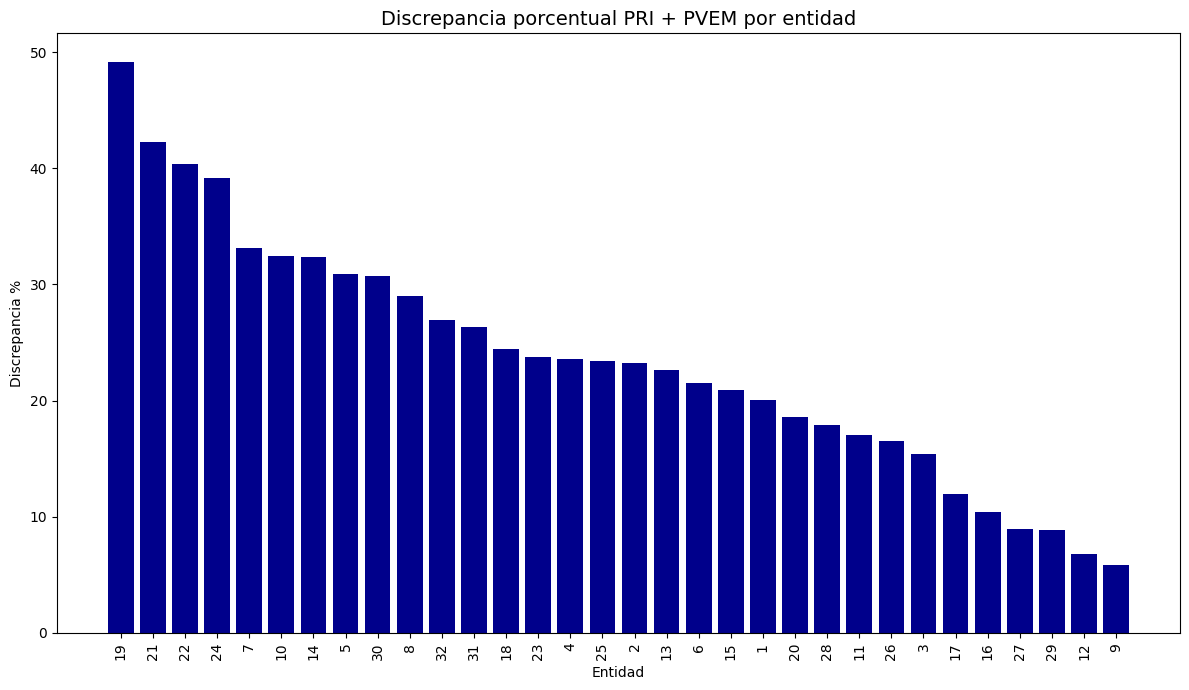

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos de discrepancia PRI + PVEM ya ordenados
data = [
    (19, 49.16),
    (21, 42.24),
    (22, 40.40),
    (24, 39.17),
    (7, 33.12),
    (10, 32.44),
    (14, 32.34),
    (5, 30.94),
    (30, 30.72),
    (8, 29.02),
    (32, 26.95),
    (31, 26.34),
    (18, 24.43),
    (23, 23.74),
    (4, 23.58),
    (25, 23.38),
    (2, 23.23),
    (13, 22.68),
    (6, 21.53),
    (15, 20.89),
    (1, 20.03),
    (20, 18.57),
    (28, 17.89),
    (11, 17.06),
    (26, 16.56),
    (3, 15.44),
    (17, 11.93),
    (16, 10.45),
    (27, 8.95),
    (29, 8.88),
    (12, 6.78),
    (9, 5.88),
]

# Crear DataFrame
df = pd.DataFrame(data, columns=["Entidad", "Discrepancia %"])

# Graficar
plt.figure(figsize=(12, 7))
plt.bar(df["Entidad"].astype(str), df["Discrepancia %"], color="darkblue")
plt.xticks(rotation=90)
plt.title("Discrepancia porcentual PRI + PVEM por entidad", fontsize=14)
plt.xlabel("Entidad")
plt.ylabel("Discrepancia %")
plt.tight_layout()
plt.show()


In [36]:
# Numero de votos totales validos en cada entidad (132) de la lista anterior
for (entidad, discrepancia) in discrepancia_ordenada:

    votos_entidad_132 = lista_votos_totales_entidad_132[entidad-1]
    votos_entidad_ine = lista_votos_totales_entidad_ine[entidad-1]

    print(f'Entidad: {entidad}, ', end='')
    print(f'número de votos (132): {votos_entidad_132:,} ({votos_entidad_132/votos_totales_132*100:.2f}%), ', end='')
    print(f'número de votos (ine): {votos_entidad_ine:,} ({votos_entidad_ine/votos_totales_ine*100:.2f}%), ', end='')
    print(f'discrepancia porcentual = {discrepancia:.2f}%')

Entidad: 19, número de votos (132): 207,687 (2.85%), número de votos (ine): 1,838,966 (3.77%), discrepancia porcentual = 49.16%
Entidad: 21, número de votos (132): 540,301 (7.41%), número de votos (ine): 2,414,225 (4.95%), discrepancia porcentual = 42.24%
Entidad: 22, número de votos (132): 136,524 (1.87%), número de votos (ine): 835,269 (1.71%), discrepancia porcentual = 40.40%
Entidad: 24, número de votos (132): 138,275 (1.90%), número de votos (ine): 928,694 (1.90%), discrepancia porcentual = 39.17%
Entidad: 7, número de votos (132): 88,710 (1.22%), número de votos (ine): 1,944,084 (3.98%), discrepancia porcentual = 33.12%
Entidad: 10, número de votos (132): 27,320 (0.37%), número de votos (ine): 672,063 (1.38%), discrepancia porcentual = 32.44%
Entidad: 14, número de votos (132): 397,638 (5.45%), número de votos (ine): 3,349,779 (6.87%), discrepancia porcentual = 32.34%
Entidad: 5, número de votos (132): 113,458 (1.56%), número de votos (ine): 1,161,481 (2.38%), discrepancia porcen

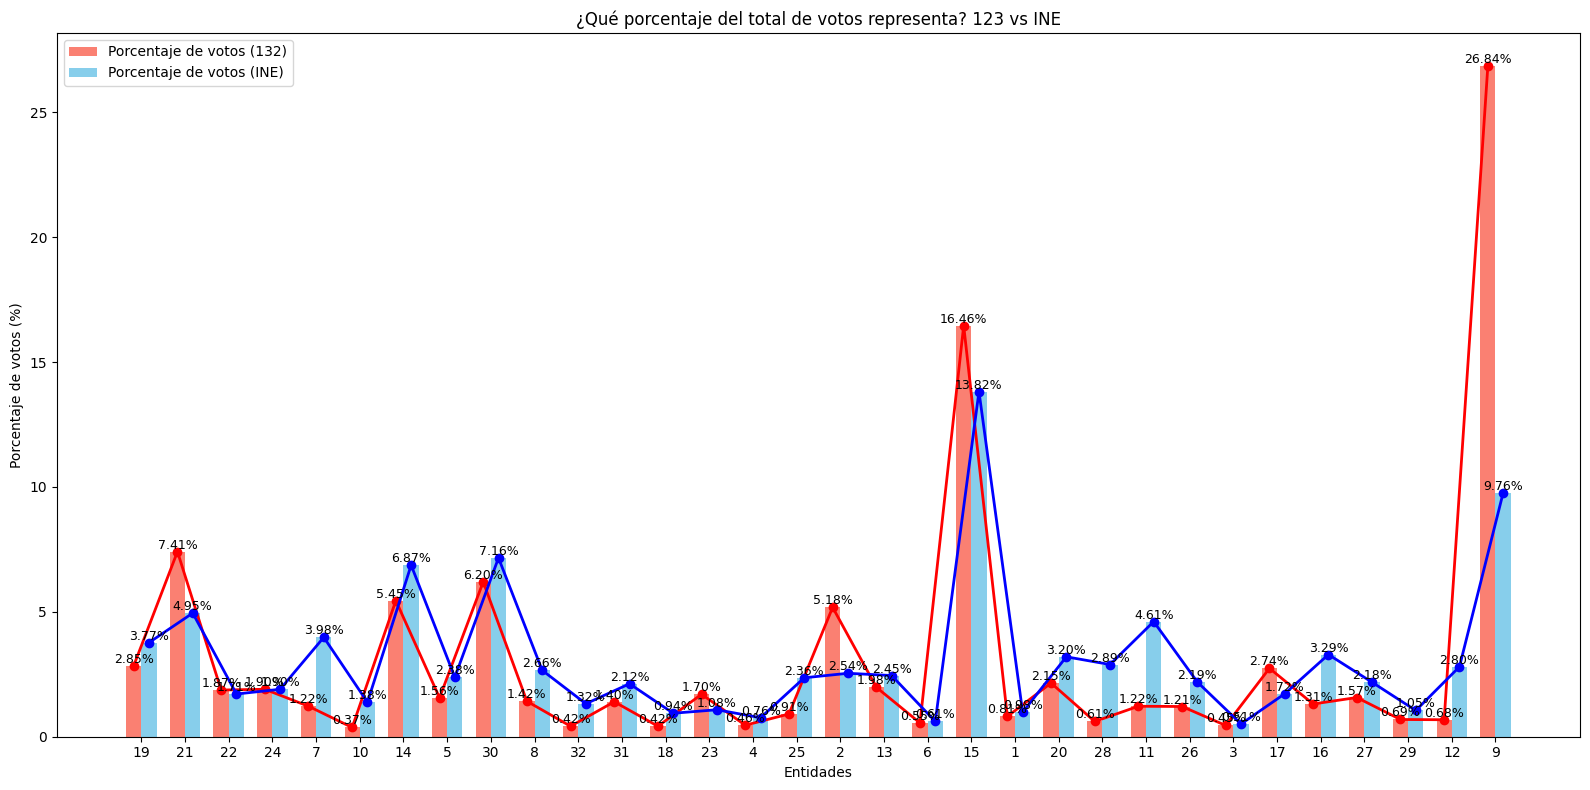

In [36]:
import matplotlib.pyplot as plt

# Datos
entidades = [19,21,22,24,7,10,14,5,30,8,32,31,18,23,4,25,2,13,6,15,1,20,28,11,26,3,17,16,27,29,12,9]
votos_132 = [2.85,7.41,1.87,1.90,1.22,0.37,5.45,1.56,6.20,1.42,0.42,1.40,0.42,1.70,0.46,0.91,5.18,1.98,0.55,16.46,0.81,2.15,0.61,1.22,1.21,0.45,2.74,1.31,1.57,0.69,0.68,26.84]
votos_ine = [3.77,4.95,1.71,1.90,3.98,1.38,6.87,2.38,7.16,2.66,1.32,2.12,0.94,1.08,0.76,2.36,2.54,2.45,0.61,13.82,0.98,3.20,2.89,4.61,2.19,0.51,1.72,3.29,2.18,1.05,2.80,9.76]

plt.figure(figsize=(16,8))
bar_width = 0.35
x = range(len(entidades))

# Barras
bars_132 = plt.bar([i - bar_width/2 for i in x], votos_132, width=bar_width, label='Porcentaje de votos (132)', color='salmon')
bars_ine = plt.bar([i + bar_width/2 for i in x], votos_ine, width=bar_width, label='Porcentaje de votos (INE)', color='skyblue')

# Líneas sobre las barras
plt.plot([i - bar_width/2 for i in x], votos_132, color='red', marker='o', linestyle='-', linewidth=2)
plt.plot([i + bar_width/2 for i in x], votos_ine, color='blue', marker='o', linestyle='-', linewidth=2)

# Porcentajes encima de las barras
for bar in bars_132:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}%', ha='center', va='bottom', fontsize=9)
for bar in bars_ine:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}%', ha='center', va='bottom', fontsize=9)

# Etiquetas y título
plt.xlabel('Entidades')
plt.ylabel('Porcentaje de votos (%)')
plt.title("¿Qué porcentaje del total de votos representa? 123 vs INE")
plt.xticks(x, entidades)
plt.legend()

plt.tight_layout()
plt.show()


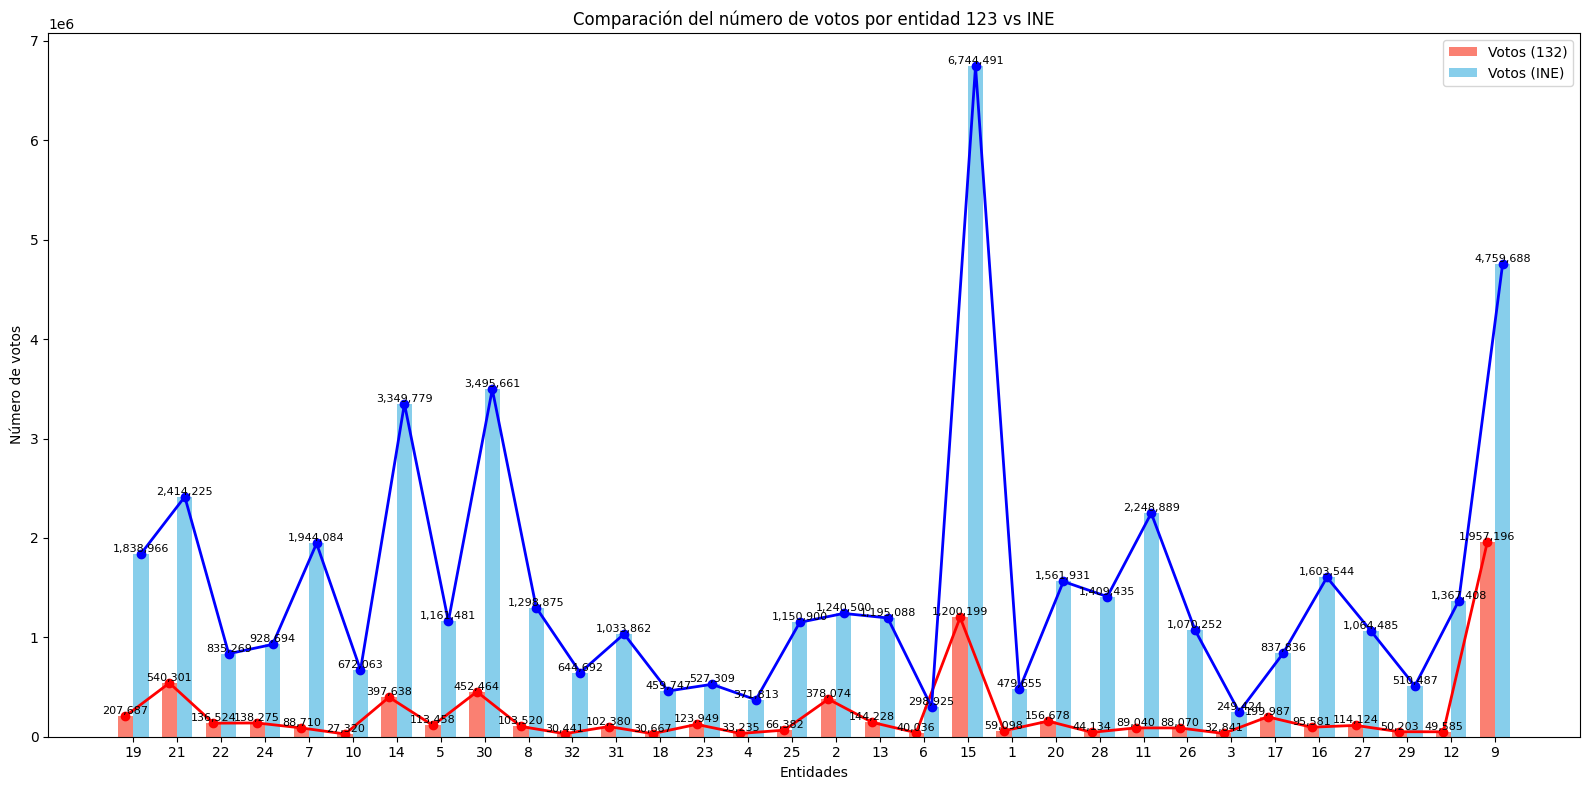

In [37]:
import matplotlib.pyplot as plt

# Datos
entidades = [19,21,22,24,7,10,14,5,30,8,32,31,18,23,4,25,2,13,6,15,1,20,28,11,26,3,17,16,27,29,12,9]
votos_132 = [207687,540301,136524,138275,88710,27320,397638,113458,452464,103520,30441,102380,30667,123949,33235,66382,378074,144228,40036,1200199,59098,156678,44134,89040,88070,32841,199987,95581,114124,50203,49585,1957196]
votos_ine = [1838966,2414225,835269,928694,1944084,672063,3349779,1161481,3495661,1298875,644692,1033862,459747,527309,371813,1150900,1240500,1195088,298925,6744491,479655,1561931,1409435,2248889,1070252,249424,837836,1603544,1064485,510487,1367408,4759688]

plt.figure(figsize=(16,8))
bar_width = 0.35
x = range(len(entidades))

# Barras
bars_132 = plt.bar([i - bar_width/2 for i in x], votos_132, width=bar_width, label='Votos (132)', color='salmon')
bars_ine = plt.bar([i + bar_width/2 for i in x], votos_ine, width=bar_width, label='Votos (INE)', color='skyblue')

# Líneas sobre las barras
plt.plot([i - bar_width/2 for i in x], votos_132, color='red', marker='o', linestyle='-', linewidth=2)
plt.plot([i + bar_width/2 for i in x], votos_ine, color='blue', marker='o', linestyle='-', linewidth=2)

# Números encima de las barras
for bar in bars_132:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height()):,}', ha='center', va='bottom', fontsize=8)
for bar in bars_ine:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height()):,}', ha='center', va='bottom', fontsize=8)

# Etiquetas y título
plt.xlabel('Entidades')
plt.ylabel('Número de votos')
plt.title('Comparación del número de votos por entidad 123 vs INE')
plt.xticks(x, entidades)
plt.legend()

plt.tight_layout()
plt.show()


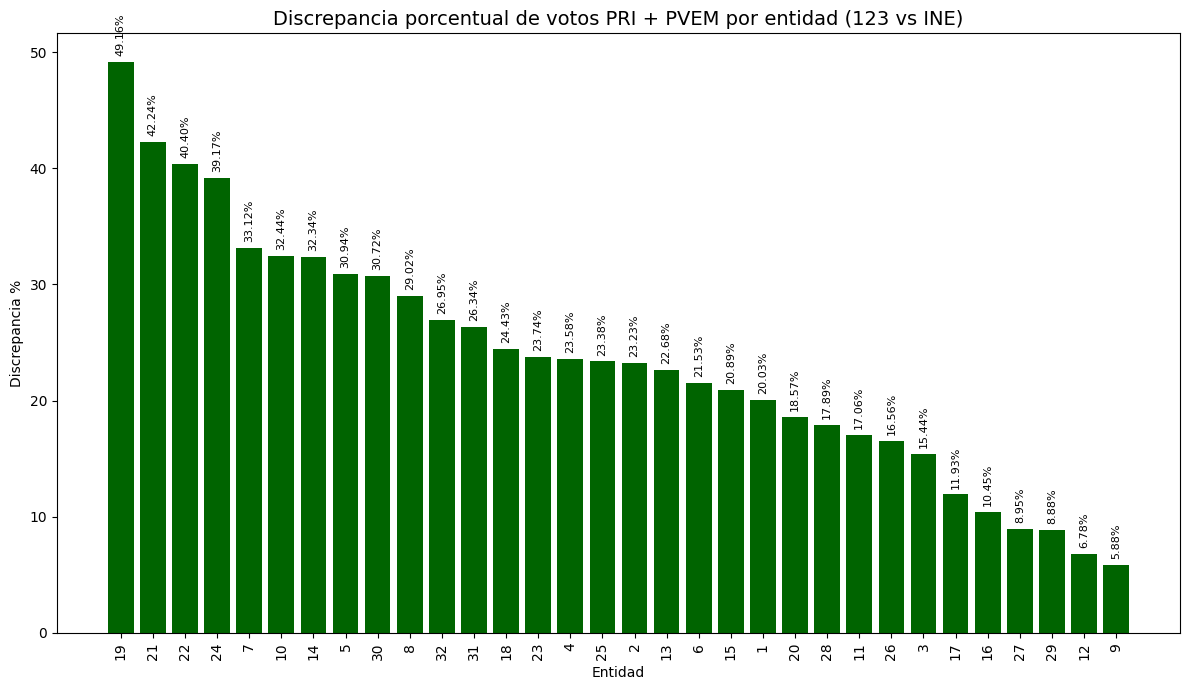

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos de discrepancia PRI + PVEM ya ordenados
data = [
    (19, 49.16),
    (21, 42.24),
    (22, 40.40),
    (24, 39.17),
    (7, 33.12),
    (10, 32.44),
    (14, 32.34),
    (5, 30.94),
    (30, 30.72),
    (8, 29.02),
    (32, 26.95),
    (31, 26.34),
    (18, 24.43),
    (23, 23.74),
    (4, 23.58),
    (25, 23.38),
    (2, 23.23),
    (13, 22.68),
    (6, 21.53),
    (15, 20.89),
    (1, 20.03),
    (20, 18.57),
    (28, 17.89),
    (11, 17.06),
    (26, 16.56),
    (3, 15.44),
    (17, 11.93),
    (16, 10.45),
    (27, 8.95),
    (29, 8.88),
    (12, 6.78),
    (9, 5.88),
]

# Crear DataFrame
df = pd.DataFrame(data, columns=["Entidad", "Discrepancia %"])

# Graficar
plt.figure(figsize=(12, 7))
bars = plt.bar(df["Entidad"].astype(str), df["Discrepancia %"], color="darkgreen")

# Escribir porcentajes encima de cada barra
for bar, value in zip(bars, df["Discrepancia %"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f"{value:.2f}%",
        ha="center",
        va="bottom",
        fontsize=8,
        rotation=90
    )

plt.xticks(rotation=90)
plt.title("Discrepancia porcentual de votos PRI + PVEM por entidad (123 vs INE)", fontsize=14)
plt.xlabel("Entidad")
plt.ylabel("Discrepancia %")
plt.tight_layout()
plt.show()


# Conclusiones / Conclusions

**Español**
### Sesgo por sobre-representación de Ciudad de México  

> En este análisis final se observa una **sobre-representación muy marcada de la entidad 9 (Ciudad de México)** dentro del dataset de *YOSOY132*. Más de una cuarta parte de los datos provienen de esta entidad, lo que introduce un **sesgo significativo** en los resultados.  

> Para evidenciarlo, se muestran los resultados **incluyendo** y **excluyendo** la Ciudad de México en el dataset de *YOSOY132*:

**English**
### Bias due to Mexico City over-representation  
>In this final analysis, a **very marked over-representation of the 9th entity (Mexico City)** is observed within the *YOSOY132* dataset. More than a quarter of the data comes from this entity, which introduces a **significant bias** in the results.

>To evidence this, results are shown **including** and **excluding** Mexico City in the YOSOY132 dataset:

**Votos incluyendo Ciudad de Mexico (YOSOY132)** / **Votes including Mexico City (YOSOY132)**

- **PAN:** 2,247,447&emsp;(30.82%)
- **PRI + VERDE:** 2,123,777&emsp;(29.12%)
- **PRD + MOV + PT:** 2,717,310&emsp;(37.26%)
- **nuevaAlianza:** 203,491&emsp;(2.79%)

**Votos excluyendo Ciudad de Mexico (YOSOY132)** / **Votes excluding Mexico City (YOSOY132)**

- **PAN:** 1,744,587&emsp;(32.70%)
- **PRI + VERDE:** 1,635,742&emsp;(30.66%)
- **PRD + MOV + PT:** 1,795,187&emsp;(33.65%)
- **NuevaAlianza:** 159,313&emsp;(2.99%)

**Español**

>Esto evidencia un **claro sesgo** hacia la coalición **"PRD + MOV + PT"** en el dataset *YOSOY132*, ya que esta obtuvo una **cantidad excepcional de votos en CDMX**, el cual representa más de un cuarto de votos totales.

**English**

>This evidences a **clear bias** towards the **"PRD + MOV + PT"** coalition in the *YOSOY132* dataset, as it obtained an **exceptional amount of votes in CDMX**, which represents more than a quarter of total votes

**Español**
### Conclusiones sobre la calidad del muestreo. ¿Son confiables los datos?

>Este análisis revela otra observación importante, el dataset de *YOSOY132* muestra **mayores discrepancias porcentuales en las entidades sub-representadas**, donde el número absoluto de votos es muy bajo.  

>Esto indica que el muestreo **no estuvo bien segmentado** y que los datos recabados **no son suficientes y/o de la calidad necesaria** para justificar o sugerir la existencia de un fraude electoral, o cualquier otra comparativa de este nivel.

**English**
### Conclusions on sampling quality. Is the data reliable?

>This analysis reveals another important observation: the *YOSOY132* dataset shows **larger percentage discrepancies in under-represented entities**, where the absolute number of votes is very low.

>This indicates that the sampling **was not well-segmented** and that the collected data are **neither sufficient nor of the necessary quality** to justify or suggest the existence of electoral fraud, or any other comparison at this level.